In [ ]:
Question No 1

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the datasets
urls = [
    'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv',
    'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv',
    'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv'
]

# Combine the datasets into one DataFrame
df_list = [pd.read_csv(url) for url in urls]
df = pd.concat(df_list, ignore_index=True)

# Drop rows with missing values in important columns
df.dropna(subset=['primary_fuel', 'capacity_mw'], inplace=True)

# Encode categorical features
le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])

le_primary_fuel = LabelEncoder()
df['primary_fuel'] = le_primary_fuel.fit_transform(df['primary_fuel'])

# Prepare features and target variables
X = df[['country', 'latitude', 'longitude', 'commissioning_year']]
y_fuel = df['primary_fuel']
y_capacity = df['capacity_mw']

# Drop rows with NaNs in X
X = X.dropna()

# Adjust y_fuel and y_capacity to match X
y_fuel = y_fuel[X.index]
y_capacity = y_capacity[X.index]

# Split the data into training and testing sets
X_train, X_test, y_fuel_train, y_fuel_test, y_capacity_train, y_capacity_test = train_test_split(X, y_fuel, y_capacity, test_size=0.2, random_state=42)

# Train a RandomForestClassifier for primary fuel prediction
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_fuel_train)
y_fuel_pred = rf_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_fuel_test, y_fuel_pred)
print(f'Primary Fuel Prediction Accuracy: {accuracy * 100:.2f}%')

# Train a RandomForestRegressor for capacity prediction
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_capacity_train)
y_capacity_pred = rf_reg.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_capacity_test, y_capacity_pred)
print(f'Capacity Prediction Mean Squared Error: {mse:.2f}')

# To make predictions on new data
new_data = pd.DataFrame({
    'country': ['USA'],
    'latitude': [34.0522],
    'longitude': [-118.2437],
    'commissioning_year': [2020]
})

new_data['country'] = le_country.transform(new_data['country'])
predicted_fuel = rf_clf.predict(new_data)
predicted_capacity = rf_reg.predict(new_data)

print(f'Predicted Primary Fuel: {le_primary_fuel.inverse_transform(predicted_fuel)}')
print(f'Predicted Capacity (MW): {predicted_capacity[0]:.2f}')


Primary Fuel Prediction Accuracy: 71.64%
Capacity Prediction Mean Squared Error: 84887.48
Predicted Primary Fuel: ['Solar']
Predicted Capacity (MW): 8.90


In [ ]:
Question No 2

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64
Next Day Maximum Temperature Prediction Mean Squared Error: 1.01
Next Day Minimum Temperature Prediction Mean Squared Error: 0.62


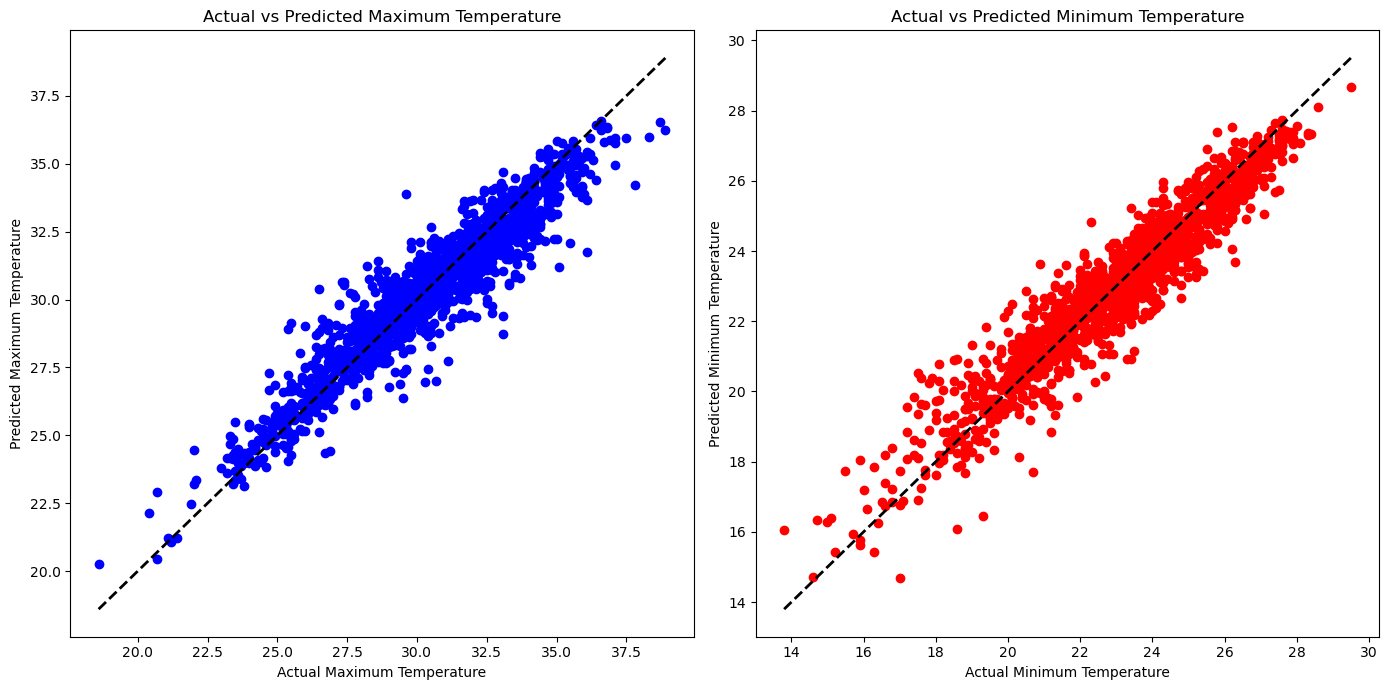

Predicted Next Day Maximum Temperature: 31.26°C
Predicted Next Day Minimum Temperature: 19.05°C


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv'
df = pd.read_csv(url)

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Prepare features and target variables
X = df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 
        'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1',
        'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 
        'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation']]

y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(X, y_max, y_min, test_size=0.2, random_state=42)

# Train a RandomForestRegressor for maximum temperature prediction
rf_max = RandomForestRegressor(random_state=42)
rf_max.fit(X_train, y_max_train)
y_max_pred = rf_max.predict(X_test)

# Evaluate the regressor for maximum temperature
mse_max = mean_squared_error(y_max_test, y_max_pred)
print(f'Next Day Maximum Temperature Prediction Mean Squared Error: {mse_max:.2f}')

# Train a RandomForestRegressor for minimum temperature prediction
rf_min = RandomForestRegressor(random_state=42)
rf_min.fit(X_train, y_min_train)
y_min_pred = rf_min.predict(X_test)

# Evaluate the regressor for minimum temperature
mse_min = mean_squared_error(y_min_test, y_min_pred)
print(f'Next Day Minimum Temperature Prediction Mean Squared Error: {mse_min:.2f}')

# Plotting the results for better visualization
plt.figure(figsize=(14, 7))

# Maximum Temperature
plt.subplot(1, 2, 1)
plt.scatter(y_max_test, y_max_pred, color='blue')
plt.plot([y_max_test.min(), y_max_test.max()], [y_max_test.min(), y_max_test.max()], 'k--', lw=2)
plt.xlabel('Actual Maximum Temperature')
plt.ylabel('Predicted Maximum Temperature')
plt.title('Actual vs Predicted Maximum Temperature')

# Minimum Temperature
plt.subplot(1, 2, 2)
plt.scatter(y_min_test, y_min_pred, color='red')
plt.plot([y_min_test.min(), y_min_test.max()], [y_min_test.min(), y_min_test.max()], 'k--', lw=2)
plt.xlabel('Actual Minimum Temperature')
plt.ylabel('Predicted Minimum Temperature')
plt.title('Actual vs Predicted Minimum Temperature')

plt.tight_layout()
plt.show()

# To make predictions on new data
new_data = pd.DataFrame({
    'station': [1],
    'Present_Tmax': [30],
    'Present_Tmin': [20],
    'LDAPS_RHmin': [50],
    'LDAPS_RHmax': [80],
    'LDAPS_Tmax_lapse': [32],
    'LDAPS_Tmin_lapse': [21],
    'LDAPS_WS': [5],
    'LDAPS_LH': [150],
    'LDAPS_CC1': [0.5],
    'LDAPS_CC2': [0.6],
    'LDAPS_CC3': [0.7],
    'LDAPS_CC4': [0.8],
    'LDAPS_PPT1': [5],
    'LDAPS_PPT2': [6],
    'LDAPS_PPT3': [7],
    'LDAPS_PPT4': [8],
    'lat': [37.5],
    'lon': [127.0],
    'DEM': [50],
    'Slope': [3],
    'Solar radiation': [5000]
})

predicted_max = rf_max.predict(new_data)
predicted_min = rf_min.predict(new_data)

print(f'Predicted Next Day Maximum Temperature: {predicted_max[0]:.2f}°C')
print(f'Predicted Next Day Minimum Temperature: {predicted_min[0]:.2f}°C')


In [ ]:
Question No 3

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan Status Prediction Accuracy: 79.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.43      0.56        37
           1       0.80      0.95      0.87        86

    accuracy                           0.80       123
   macro avg       0.80      0.69      0.71       123
weighted avg       0.80      0.80      0.78       123



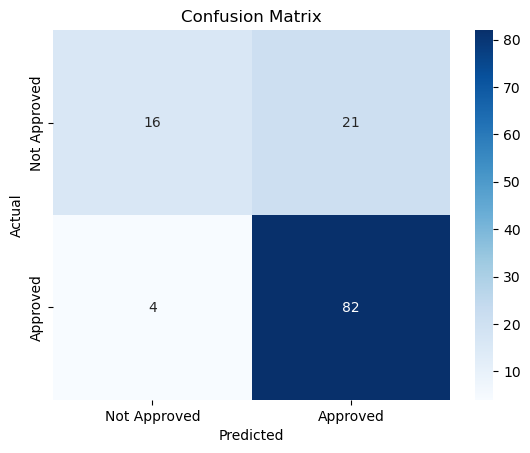

Predicted Loan Status: Approved


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv'
df = pd.read_csv(url)

# Rename columns to match the provided description
df.columns = [
    'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
    'Credit_History', 'Property_Area', 'Loan_Status'
]

# Check for missing values
print(df.isnull().sum())

# Fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df['Gender'] = imputer.fit_transform(df[['Gender']]).ravel()
df['Married'] = imputer.fit_transform(df[['Married']]).ravel()
df['Dependents'] = imputer.fit_transform(df[['Dependents']]).ravel()
df['Self_Employed'] = imputer.fit_transform(df[['Self_Employed']]).ravel()
df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']]).ravel()
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']]).ravel()
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']]).ravel()

# Encode categorical features
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_married = LabelEncoder()
df['Married'] = le_married.fit_transform(df['Married'])

le_education = LabelEncoder()
df['Education'] = le_education.fit_transform(df['Education'])

le_self_employed = LabelEncoder()
df['Self_Employed'] = le_self_employed.fit_transform(df['Self_Employed'])

le_property_area = LabelEncoder()
df['Property_Area'] = le_property_area.fit_transform(df['Property_Area'])

le_loan_status = LabelEncoder()
df['Loan_Status'] = le_loan_status.fit_transform(df['Loan_Status'])

df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Prepare features and target variables
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
        'Credit_History', 'Property_Area']]

y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Loan Status Prediction Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# To make predictions on new data
new_data = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': [1],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1.0],
    'Property_Area': ['Urban']
})

new_data['Gender'] = le_gender.transform(new_data['Gender'])
new_data['Married'] = le_married.transform(new_data['Married'])
new_data['Education'] = le_education.transform(new_data['Education'])
new_data['Self_Employed'] = le_self_employed.transform(new_data['Self_Employed'])
new_data['Property_Area'] = le_property_area.transform(new_data['Property_Area'])

predicted_status = rf_clf.predict(new_data)
print(f'Predicted Loan Status: {"Approved" if predicted_status[0] == 1 else "Not Approved"}')
